Facebook's Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works well with daily periodicity data with at least one year of historical data, and it can handle missing data and trend shifts.

[*********************100%%**********************]  1 of 1 completed
15:52:37 - cmdstanpy - INFO - Chain [1] start processing
15:52:37 - cmdstanpy - INFO - Chain [1] done processing


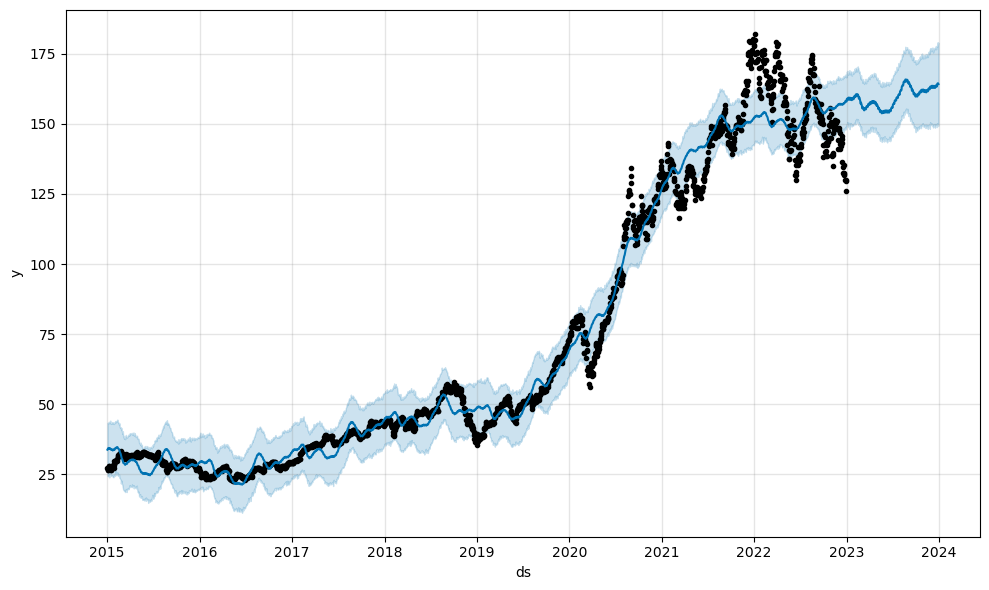

In [7]:
from prophet import Prophet
import yfinance as yf

# Load data
data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')
df = data.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Model fitting
model = Prophet(daily_seasonality=True)
model.fit(df)

# Make future dataframe for predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plotting the results
fig1 = model.plot(forecast)

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(actual, predicted):
    """
    Calculate RMSE, MAE, and MAPE given actual and predicted values.

    Args:
    actual (array-like): The actual observed values.
    predicted (array-like): The forecasted values.

    Returns:
    dict: A dictionary containing the RMSE, MAE, and MAPE.
    """
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

In [9]:
# Extract actual and predicted values
# Ensure the forecast aligns with actual values by appropriate date filtering
actual = df['y']
predicted = forecast['yhat'][:len(actual)]

# Calculate metrics
prophet_metrics = calculate_metrics(actual, predicted)
print('Prophet Metrics:', prophet_metrics)

Prophet Metrics: {'RMSE': 7.3059291668972675, 'MAE': 5.077308421918975, 'MAPE': 7.779484349292839}
